In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils   #第一部分，初始化
import reg_utils    #第二部分，正则化
import gc_utils     #第三部分，梯度校验
#%matplotlib inline #如果你使用的是Jupyter Notebook，请取消注释。
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

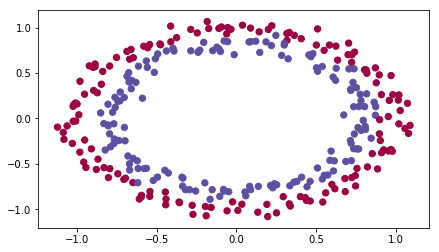

In [8]:
train_X, train_Y, test_X, test_Y = init_utils.load_dataset(is_plot=True)
def initialize_parameters_zeros(layer_dims):
    parameters={}
    L=len(layer_dims)
    for i in range(1,L):
        parameters["W"+str(i)]=np.zeros((layer_dims[i],layer_dims[i-1]))
        parameters["b"+str(i)]=np.zeros((layer_dims[i]),1)
    return parameters
def initialize_parameters_random(layer_dims):
    parameters={}
    L=len(layer_dims)
    for i in range(1,L):
        parameters["W"+str(i)]=np.random.randn(layer_dims[i],layer_dims[i-1])*10
        parameters["b"+str(i)]=np.zeros((layer_dims[i]),1)
    return parameters
def initialize_parameters_he(layer_dims):
    parameters={}
    L=len(layer_dims)
    for i in range(1,L):
        parameters["W"+str(i)]=np.random.randn(layer_dims[i],layer_dims[i-1])*np.sqrt(2/layer_dims[i-1])
        parameters["b"+str(i)]=np.zeros((layer_dims[i]),1)
    return parameters

In [11]:
def model(X,Y,learning_rate=0.01,num_iterations=15000,print_cost=True,initialization="he",is_polt=True):
    costs=[]
    grads={}
    m=X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    if initialization=="zeros":
        parameters=initialize_parameters_zeros(layers_dims) 
    elif initialization=="random":
        parameters=initialize_parameters_random(layers_dims)
    elif initialization=="he":
        parameters=initialize_parameters_he(layers_dims)
    else:
        exit
    for i in range(num_iterations):
        A3,cache=init_utils.forward_propagation(X,parameters)
        cost=init_utils.compute_loss(A3,Y)
        grads=init_utils.backward_propagation(X,Y,cache)
        parameters=init_utils.update_parameters(parameters,grads,learning_rate)
        if i%1000==0:
            costs.append(cost)
            if print_cost:
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))
    if is_polt:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()          
    return parameters

In [ ]:
train_X, train_Y, test_X, test_Y = reg_utils.load_2D_dataset(is_plot=True)
